# Pandas Review

### Workshop Duration: ~60 Minutes

An introduction to Pandas, Matplotlib and Seaborne python Libraries for data science. 

We'll analyze two datasets in this review session: `drinks` and `ufo`.
* `Drinks` is downloaded from [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption) and analyzed in [this article](http://fivethirtyeight.com/datalab/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)
* `UFO` is scraped from the [National UFO Reporting Center](http://www.nuforc.org/webreports.html) and analyzed in [this article](http://josiahjdavis.com/identifying-with-ufos)
* [Magic Functions](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) - %matplotlib inline
* [Pandas: Intro to Data Structures](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html)

### How to use this Notebook <a id="1"></a>

##### 1. Examples: This is your opportunity to observe. Most of the examples contains code and information that could be used to solve your exercises.
##### 2. Exercises: This is your opportunity to get hands on and try solving the challenges.
 
 - *Running the cells in the example section may break since there are references to file paths not on your local system.*
 - *If you run a cell that references a library that has not been installed you will see an error. Work with the supporting instructors to get this set up if you are having trouble.*
 - *This workshop contains lots of infomration and time is limited. We encourage everyone to spend time working these examples and exercises in detail after completing this bootcamp.*


#### AGENDA

- Example 1: Reading & Summarizing Data (2 Minutes)
- Exercise 1: Exploration with Pandas (10 Minutes)
- Example 2: Subsetting /Slicing / Filtering / Sorting / Duplucates (15 Minutes)
- Exercise 2: European Wine & Beer Consumption (10 Minutes)
- Example 3: Modifying DataFrames (5 Minutes)
- Example 4: Handling Missing Values (10 Minutes)
- Exercise 3: Modifying DataFrames (8 Minutes)
- Example 5: Visualizations Plotting (15 Minutes)
- Exercise 4: Statistical Visualizations (10 Minutes)
- Example 6: Indexing Manipulations (5 Minutes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example 1: Reading & Summarizing Data
*5 Minutes*

Running this next line of code assumes that your console working directory is set up correctly

To set your working directory:
1. Print your currenting directory using the ipython magic function: `%pwd`
2. If you need to make a change using the magic function `%cd <newdir>`

In [2]:
%pwd

'C:\\Users\\deesaw\\Desktop\\pre_work\\code'

In [3]:
ufo = pd.read_csv('../data/ufo.csv') # `..` goes up one level in the directory

### Dataframe Summary
Print the whole dataframe by typing its name

In [4]:
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


Look at the at top x observations

In [5]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Bottom x observations (defaults to 5)

In [6]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43
80542,Loughman,NaN,LIGHT,FL,9/5/2014 5:30


In [7]:
 # describe any numeric columns (unless all columns are non-numeric)
ufo.describe()

,City,Colors Reported,Shape Reported,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [8]:
# "the index" (aka "the labels")
ufo.index

RangeIndex(start=0, stop=80543, step=1)

In [9]:
# column names (which is "an index")
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [10]:
# gives us a tuple of (# rows, # cols)
ufo.shape

(80543, 5)

In [11]:
# data types of each column
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [12]:
# underlying numpy array
ufo.values

array([['Ithaca', nan, 'TRIANGLE', 'NY', '6/1/1930 22:00'],
       ['Willingboro', nan, 'OTHER', 'NJ', '6/30/1930 20:00'],
       ['Holyoke', nan, 'OVAL', 'CO', '2/15/1931 14:00'],
       ...,
       ['Tucson', 'RED BLUE', nan, 'AZ', '9/5/2014 2:40'],
       ['Orland park', 'RED', 'LIGHT', 'IL', '9/5/2014 3:43'],
       ['Loughman', nan, 'LIGHT', 'FL', '9/5/2014 5:30']], dtype=object)

### DataFrame vs Series, selecting a column

In [13]:
type(ufo)

pandas.core.frame.DataFrame

In [14]:
isinstance(ufo, pd.DataFrame)

True

In [15]:
ufo['State']

0        NY
1        NJ
2        CO
3        KS
4        NY
         ..
80538    NE
80539    OH
80540    AZ
80541    IL
80542    FL
Name: State, Length: 80543, dtype: object

In [16]:
ufo.State #equivalent to ufo['State']

0        NY
1        NJ
2        CO
3        KS
4        NY
         ..
80538    NE
80539    OH
80540    AZ
80541    IL
80542    FL
Name: State, Length: 80543, dtype: object

In [17]:
ufo['Shape Reported'] # Must use the [''] notation if column name has a space

0        TRIANGLE
1           OTHER
2            OVAL
3            DISK
4           LIGHT
           ...   
80538      CIRCLE
80539       LIGHT
80540         NaN
80541       LIGHT
80542       LIGHT
Name: Shape Reported, Length: 80543, dtype: object

In [18]:
type(ufo.State)

pandas.core.series.Series

### Summaring a non-numeric column
`pd.DataFrame.Column.describe()` only works for non-numeric if you don't have any numeric data

In [19]:
ufo.describe(include='all')

,City,Colors Reported,Shape Reported,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


If you have categorical columns, you can use the `value_counts()` method to count the number of occurences. This comes in handy quite often.

In [20]:
ufo.State.value_counts()

CA    10743
WA     4809
FL     4804
TX     4186
NY     3677
AZ     3019
PA     2986
IL     2957
OH     2783
MI     2347
NC     2156
OR     2111
MO     1806
CO     1717
NJ     1712
IN     1596
VA     1582
GA     1564
MA     1557
WI     1491
TN     1365
SC     1302
MN     1217
CT     1105
KY     1040
MD     1036
NV     1023
NM      931
OK      873
UT      823
AL      808
IA      799
AR      748
KS      739
ME      712
LA      699
ID      648
NH      618
MT      602
WV      559
MS      478
NE      461
HI      410
AK      403
VT      356
RI      331
WY      239
SD      234
DE      221
ND      155
Fl        4
Ca        1
Name: State, dtype: int64

In [21]:
ufo.shape[0]

80543

You can also apply operations (vectorized) on the value counts: ie dividing by the total number of records to get % of total.

In [22]:
ufo.State.value_counts() / ufo.shape[0]

CA    0.133382
WA    0.059707
FL    0.059645
TX    0.051972
NY    0.045653
AZ    0.037483
PA    0.037073
IL    0.036713
OH    0.034553
MI    0.029140
NC    0.026768
OR    0.026210
MO    0.022423
CO    0.021318
NJ    0.021256
IN    0.019816
VA    0.019642
GA    0.019418
MA    0.019331
WI    0.018512
TN    0.016947
SC    0.016165
MN    0.015110
CT    0.013719
KY    0.012912
MD    0.012863
NV    0.012701
NM    0.011559
OK    0.010839
UT    0.010218
AL    0.010032
IA    0.009920
AR    0.009287
KS    0.009175
ME    0.008840
LA    0.008679
ID    0.008045
NH    0.007673
MT    0.007474
WV    0.006940
MS    0.005935
NE    0.005724
HI    0.005090
AK    0.005004
VT    0.004420
RI    0.004110
WY    0.002967
SD    0.002905
DE    0.002744
ND    0.001924
Fl    0.000050
Ca    0.000012
Name: State, dtype: float64

# Exercise 1: Getting data & exploring the contents using pandas
*10 Minutes*

1. Read in `drinks.csv' into a DataFrame called 'drinks'
2. Print the head and the tail
3. Examine the default data types and shape
4. Describe the `beer_savings` Series

In [23]:
# 1. Read in CSV
df=pd.read_csv('../data/drinks.csv')

In [25]:
# 2a. Print Head
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [26]:
# 2b. Print Tail
df.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [ ]:
# 3. Examine data types - remember .describe(), .index, .columns, .shape, .dtypes

In [28]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [37]:
df.isnull().any()

country                         False
beer_servings                   False
spirit_servings                 False
wine_servings                   False
total_litres_of_pure_alcohol    False
continent                        True
dtype: bool

In [38]:
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [39]:
df.isnull().any().sum()

1

In [32]:
df.index

RangeIndex(start=0, stop=193, step=1)

In [33]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [31]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [34]:
df.shape

(193, 6)

# Example 2: Subsetting /Slicing / Filtering / Sorting / Duplucates

*15 Minutes*
 
Selecting multiple columns

In [40]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [41]:
ufo[['State', 'City', 'Shape Reported']]

,State,City,Shape Reported
0,NY,Ithaca,TRIANGLE
1,NJ,Willingboro,OTHER
2,CO,Holyoke,OVAL
3,KS,Abilene,DISK
4,NY,New York Worlds Fair,LIGHT
...,...,...,...
80538,NE,Neligh,CIRCLE
80539,OH,Uhrichsville,LIGHT
80540,AZ,Tucson,NaN
80541,IL,Orland park,LIGHT


In [42]:
type(ufo[['State', 'City', 'Shape Reported']])

pandas.core.frame.DataFrame

## [] operator selects a set of rows and/or columns from a DataFrame. 

To slice out a set of rows, you use the following syntax: data[start:stop]. When slicing in pandas the start bound is included in the output. The stop bound is one step BEYOND the row you want to select.

[Pandas loc() for slicing](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) - With loc() can use column names as well as index values.

[Pandas iloc() for slicing](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) - With iloc() you can only use index values.

### Subsets

In [43]:
# select rows 0,1,2 (but not 3) -- dataFrame[start:stop]
ufo[0:5]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


### Slicing with iloc()
We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

iloc: indexing via integers

In [44]:
# iloc[row_start:row_end-1,column_start-1:column_end]
ufo.iloc[:,:] # return everything

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


In [45]:
# it reads row_start through row_end -1 & column_start-1 through column_end
ufo.iloc[0:6,:] # return labels 0-5 and all columns

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30


In [46]:
ufo.iloc[0:5,1:4] # 

,Colors Reported,Shape Reported,State
0,NaN,TRIANGLE,NY
1,NaN,OTHER,NJ
2,NaN,OVAL,CO
3,NaN,DISK,KS
4,NaN,LIGHT,NY


### Slicing with loc()

loc: indexing via labels or integers

In [47]:
# Row with label 1
ufo.loc[1:4]

,City,Colors Reported,Shape Reported,State,Time
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [48]:
# Row with labels 0 thru 3
ufo.loc[:3,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [49]:
# Rows 1-3, columns 'city thru 'Shape Reported
ufo.loc[1:3, 'City':'Shape Reported']

,City,Colors Reported,Shape Reported
1,Willingboro,NaN,OTHER
2,Holyoke,NaN,OVAL
3,Abilene,NaN,DISK


In [50]:
# all rows, columns 'City' through 'Shape Reported'
ufo.loc[:, 'City':'Shape Reported']

,City,Colors Reported,Shape Reported
0,Ithaca,NaN,TRIANGLE
1,Willingboro,NaN,OTHER
2,Holyoke,NaN,OVAL
3,Abilene,NaN,DISK
4,New York Worlds Fair,NaN,LIGHT
...,...,...,...
80538,Neligh,NaN,CIRCLE
80539,Uhrichsville,NaN,LIGHT
80540,Tucson,RED BLUE,NaN
80541,Orland park,RED,LIGHT


In [51]:
# rows 1 and 3, columns 'City' and 'Shape Reported'
ufo.loc[[1,3], ['City','Shape Reported']]

,City,Shape Reported
1,Willingboro,OTHER
3,Abilene,DISK


In [52]:
# mixing: select columns by LABEL, then filter rows by POSITION
ufo.City[0:3]

0         Ithaca
1    Willingboro
2        Holyoke
Name: City, dtype: object

In [53]:
ufo[['City', 'Shape Reported']][0:3]

,City,Shape Reported
0,Ithaca,TRIANGLE
1,Willingboro,OTHER
2,Holyoke,OVAL


In [54]:
ufo.loc[1,:]

City                   Willingboro
Colors Reported                NaN
Shape Reported               OTHER
State                           NJ
Time               6/30/1930 20:00
Name: 1, dtype: object

In [55]:
ufo.filter(items=['City','State']).head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


### Logical Filtering

In [56]:
ufo[ufo.State == 'TX']

,City,Colors Reported,Shape Reported,State,Time
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00
114,Post,NaN,DISK,TX,9/15/1949 21:00
...,...,...,...,...,...
80287,Lago Vista,NaN,TRIANGLE,TX,8/26/2014 3:35
80350,Houston,NaN,TRIANGLE,TX,8/28/2014 19:55
80414,Eustace,NaN,LIGHT,TX,8/30/2014 23:00
80476,Fort Worth,NaN,OTHER,TX,9/2/2014 16:05


In [59]:
# ufo[(ufo.State != 'TX')]  
ufo[(ufo.State == 'TX') == False]
#ufo[~(ufo.State != 'TX')]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


In [61]:
ufo.City[ufo.State == 'TX'] # note the output type being series

37           Dallas
43            Alice
49           Conroe
92           Borger
114            Post
            ...    
80287    Lago Vista
80350       Houston
80414       Eustace
80476    Fort Worth
80534      Burleson
Name: City, Length: 4186, dtype: object

In [62]:
ufo[ufo.State == 'TX'].City # Same thing as previous cell

37           Dallas
43            Alice
49           Conroe
92           Borger
114            Post
            ...    
80287    Lago Vista
80350       Houston
80414       Eustace
80476    Fort Worth
80534      Burleson
Name: City, Length: 4186, dtype: object

In [63]:
# https://www.w3schools.com/python/python_operators.asp

ufo[(ufo.State == 'CA') | (ufo.State =='TX')] # use of the pipe symbol a.k.a python bitwise OR operator

,City,Colors Reported,Shape Reported,State,Time
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
10,Fontana,NaN,LIGHT,CA,8/15/1937 21:00
15,Forest Home,NaN,CIRCLE,CA,7/2/1941 11:30
16,Los Angeles,NaN,NaN,CA,2/25/1942 0:00
25,San Diego,NaN,CIGAR,CA,1/1/1944 12:00
...,...,...,...,...,...
80421,Manteca,NaN,SPHERE,CA,8/31/2014 2:20
80442,El Cajon,NaN,TRIANGLE,CA,8/31/2014 22:35
80476,Fort Worth,NaN,OTHER,TX,9/2/2014 16:05
80516,Glendale,NaN,CYLINDER,CA,9/4/2014 17:38


In [64]:
ufo[(ufo.City == 'Austin') & (ufo.State =='TX')]

,City,Colors Reported,Shape Reported,State,Time
964,Austin,NaN,NaN,TX,4/1/1965 5:30
1712,Austin,NaN,DISK,TX,8/15/1968 5:00
1889,Austin,NaN,SPHERE,TX,9/9/1969 21:10
2205,Austin,NaN,LIGHT,TX,6/1/1972 18:00
2387,Austin,NaN,SPHERE,TX,6/1/1973 21:00
...,...,...,...,...,...
79302,Austin,ORANGE,CIRCLE,TX,7/14/2014 5:10
79572,Austin,GREEN,NaN,TX,7/27/2014 0:30
79676,Austin,RED,NaN,TX,8/1/2014 20:55
79965,Austin,NaN,CIRCLE,TX,8/15/2014 6:45


In [65]:
ufo[ufo.City.isin(['Austin','Dallas', 'Houston'])]

,City,Colors Reported,Shape Reported,State,Time
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
267,Houston,NaN,DISK,TX,6/1/1954 0:00
373,Houston,NaN,TRIANGLE,TX,6/30/1956 18:30
392,Dallas,NaN,NaN,TX,1/1/1957 21:00
414,Dallas,NaN,OTHER,TX,6/30/1957 0:00
...,...,...,...,...,...
79767,Dallas,NaN,TRIANGLE,GA,8/4/2014 21:00
79965,Austin,NaN,CIRCLE,TX,8/15/2014 6:45
79969,Austin,RED,CIRCLE,TX,8/15/2014 18:45
79986,Houston,YELLOW,CIRCLE,TX,8/15/2014 23:30


## Sorting

In [66]:
# only works for a Series
ufo.State.sort_values()

7233     AK
61317    AK
13440    AK
67070    AK
4716     AK
         ..
13839    WY
79568    WY
13825    WY
62612    WY
36166    WY
Name: State, Length: 80543, dtype: object

In [67]:
dfsorted = pd.DataFrame(ufo.State.sort_values())
dfsorted

,State
7233,AK
61317,AK
13440,AK
67070,AK
4716,AK
...,...
13839,WY
79568,WY
13825,WY
62612,WY


In [68]:
# sort rows by label -- inplace=True applies this function permanently to the underlying data
ufo.sort_index(inplace=True)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


In [69]:
ufo.sort_index(ascending=False)

,City,Colors Reported,Shape Reported,State,Time
80542,Loughman,NaN,LIGHT,FL,9/5/2014 5:30
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
...,...,...,...,...,...
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [70]:
# sort rows by specific column
ufo.sort_values(by='State')

,City,Colors Reported,Shape Reported,State,Time
7233,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
61317,Anchorage,NaN,SPHERE,AK,1/23/2012 19:30
13440,Anchorage,NaN,DISK,AK,5/6/1999 13:30
67070,Ketchikan,NaN,LIGHT,AK,11/9/2012 22:00
4716,Juneau,ORANGE,SPHERE,AK,6/15/1982 14:00
...,...,...,...,...,...
13839,"Medicine Bow National Mountains, Medicine Bow ...",NaN,FLASH,WY,7/3/1999 21:45
79568,Cheyenne,NaN,TRIANGLE,WY,7/26/2014 23:10
13825,Green River,NaN,OTHER,WY,7/1/1999 23:00
62612,Rock Springs,NaN,CIRCLE,WY,4/21/2012 23:05


In [71]:
# sort by multiple columns
ufo.sort_values(by=['State', 'Shape Reported'])

,City,Colors Reported,Shape Reported,State,Time
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
413,Arctic,NaN,CIGAR,AK,6/30/1957 0:00
1306,Delta Junction,ORANGE,CIGAR,AK,9/15/1966 18:00
1891,Fairbanks,NaN,CIGAR,AK,9/20/1969 23:00
7233,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
...,...,...,...,...,...
47842,Casper,NaN,NaN,WY,2/2/2009 6:00
52361,Cheyenne,NaN,NaN,WY,4/10/2010 21:00
53722,Lander,NaN,NaN,WY,7/18/2010 23:00
73095,Clark,NaN,NaN,WY,10/5/2013 12:15


In [74]:
# specify sort order
ufo.sort_values(by=['State', 'Shape Reported'], ascending=[True, True], inplace=True)
ufo.reset_index()

,index,City,Colors Reported,Shape Reported,State,Time
0,8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
1,413,Arctic,NaN,CIGAR,AK,6/30/1957 0:00
2,1306,Delta Junction,ORANGE,CIGAR,AK,9/15/1966 18:00
3,1891,Fairbanks,NaN,CIGAR,AK,9/20/1969 23:00
4,7233,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
...,...,...,...,...,...,...
80538,47842,Casper,NaN,NaN,WY,2/2/2009 6:00
80539,52361,Cheyenne,NaN,NaN,WY,4/10/2010 21:00
80540,53722,Lander,NaN,NaN,WY,7/18/2010 23:00
80541,73095,Clark,NaN,NaN,WY,10/5/2013 12:15


In [75]:
ufo.reset_index(drop=True, inplace=True)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
1,Arctic,NaN,CIGAR,AK,6/30/1957 0:00
2,Delta Junction,ORANGE,CIGAR,AK,9/15/1966 18:00
3,Fairbanks,NaN,CIGAR,AK,9/20/1969 23:00
4,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
...,...,...,...,...,...
80538,Casper,NaN,NaN,WY,2/2/2009 6:00
80539,Cheyenne,NaN,NaN,WY,4/10/2010 21:00
80540,Lander,NaN,NaN,WY,7/18/2010 23:00
80541,Clark,NaN,NaN,WY,10/5/2013 12:15


### Duplicate Rows

In [76]:
# Series of logicals
ufo.duplicated(subset=['City','Colors Reported','Shape Reported','State','Time'])

0        False
1        False
2        False
3        False
4        False
         ...  
80538    False
80539    False
80540    False
80541    False
80542    False
Length: 80543, dtype: bool

In [77]:
ufo.duplicated().sum()

580

In [78]:
# columns for identifying duplicates
ufo.duplicated(['City','State','Time']).sum()

1232

In [79]:
# only show duplicates
ufo[ufo.duplicated(['State','Time'])]

,City,Colors Reported,Shape Reported,State,Time
82,Anchorage,RED,DISK,AK,3/29/2008 11:00
113,Palmer,NaN,FLASH,AK,1/8/1999 22:45
114,Wasilla,NaN,FLASH,AK,1/8/1999 22:45
153,Seward,NaN,LIGHT,AK,9/2/1999 21:00
201,Homer,NaN,LIGHT,AK,7/18/2012 1:00
...,...,...,...,...,...
80265,Ansted,NaN,NaN,WV,6/22/2002 21:00
80361,Rock River,NaN,FIREBALL,WY,8/17/2001 22:30
80362,Rock River,NaN,FIREBALL,WY,8/17/2001 22:30
80465,Sheridan,NaN,OVAL,WY,9/6/2002 21:00


In [80]:
# only show unique rows
ufo[ufo.duplicated()==False] 

,City,Colors Reported,Shape Reported,State,Time
0,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
1,Arctic,NaN,CIGAR,AK,6/30/1957 0:00
2,Delta Junction,ORANGE,CIGAR,AK,9/15/1966 18:00
3,Fairbanks,NaN,CIGAR,AK,9/20/1969 23:00
4,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
...,...,...,...,...,...
80538,Casper,NaN,NaN,WY,2/2/2009 6:00
80539,Cheyenne,NaN,NaN,WY,4/10/2010 21:00
80540,Lander,NaN,NaN,WY,7/18/2010 23:00
80541,Clark,NaN,NaN,WY,10/5/2013 12:15


In [81]:
# only show unique rows v2
ufo = ufo[~ufo.duplicated()] 
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
1,Arctic,NaN,CIGAR,AK,6/30/1957 0:00
2,Delta Junction,ORANGE,CIGAR,AK,9/15/1966 18:00
3,Fairbanks,NaN,CIGAR,AK,9/20/1969 23:00
4,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
...,...,...,...,...,...
80538,Casper,NaN,NaN,WY,2/2/2009 6:00
80539,Cheyenne,NaN,NaN,WY,4/10/2010 21:00
80540,Lander,NaN,NaN,WY,7/18/2010 23:00
80541,Clark,NaN,NaN,WY,10/5/2013 12:15


In [82]:
ufo.reset_index(drop=True, inplace=True)

In [83]:
ufo.describe(include='all')

,City,Colors Reported,Shape Reported,State,Time
count,79916,16926,71617,79963,79963
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,643,5179,16219,10679,45


# Exercise 2: European Wine & Beer Consumption

*10 Minutes*

Using the `drinks` dataframe:
1. Filter DataFrame to only European countries
2. filter DataFrame to only European countries with wine_servings > 300
3. Calculate the average 'beer_servings' for the entire dataset
4. Calculate the average 'beer_servings' for all of Europe

In [84]:
# read the drinks.csv file into the 'drinks' DataFrame
ufo = pd.read_csv('../data/drinks.csv')

In [85]:
# Exploratory Analysis
ufo.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [86]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [88]:
ufo.describe().T

,count,mean,std,min,25%,50%,75%,max
beer_servings,193.0,106.160622,101.143103,0.0,20.0,76.0,188.0,376.0
spirit_servings,193.0,80.994819,88.284312,0.0,4.0,56.0,128.0,438.0
wine_servings,193.0,49.450777,79.697598,0.0,1.0,8.0,59.0,370.0
total_litres_of_pure_alcohol,193.0,4.717098,3.773298,0.0,1.3,4.2,7.2,14.4


In [90]:
# Filter for european countries
ufo.columns
ufo[ufo['continent']=='EU']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [92]:
ufo.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [ ]:
# Calculate averages

# Example 3: Modifying DataFrames

*5 Minutes*

In [93]:
ufo = pd.read_csv('../data/ufo.csv')

In [94]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [95]:
# add a new column as a function of existing columns
ufo['Location'] = ufo['City'].copy() + ', ' + ufo['State'].copy()
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [96]:
# rename columns inplace
ufo.rename(columns={'Colors Reported':'Colors', 'Shape Reported':'Shape'}, inplace=True)
# ufo.rename(columns={'Colors Reported':'Colors', 'Shape Reported':'Shape'}, inplace=False)

In [97]:
ufo.head()

,City,Colors,Shape,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [98]:
# hide a column (temporarily) - both lines achieve the same temp drop
ufo.drop(['Location'], axis=1)
#ufo[ufo.columns[:-1]]

,City,Colors,Shape,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


In [99]:
ufo.head()

,City,Colors,Shape,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [100]:
# delete a column (permanently)
del ufo['Location']

In [101]:
ufo.head()

,City,Colors,Shape,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


# Example 4: Handling Missing Values

*10 Minutes*

In [102]:
# missing values are often just excluded
ufo.describe()                          # excludes missing values

,City,Colors,Shape,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [103]:
ufo.shape

(80543, 5)

In [104]:
ufo.Shape.value_counts()                # excludes missing values

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
ROUND            2
CRESCENT         2
DOME             1
PYRAMID          1
HEXAGON          1
FLARE            1
Name: Shape, dtype: int64

In [105]:
ufo.Shape.value_counts(dropna=False)    # includes missing values (new in pandas 0.14.1)

LIGHT        16332
NaN           8402
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
ROUND            2
CRESCENT         2
HEXAGON          1
DOME             1
PYRAMID          1
FLARE            1
Name: Shape, dtype: int64

### Finding missing values in a Series

In [106]:
ufo.Shape.isnull()       # True if NaN, False otherwise

0        False
1        False
2        False
3        False
4        False
         ...  
80538    False
80539    False
80540     True
80541    False
80542    False
Name: Shape, Length: 80543, dtype: bool

In [107]:
ufo.Shape.notnull()      # False if NaN, True otherwise

0         True
1         True
2         True
3         True
4         True
         ...  
80538     True
80539     True
80540    False
80541     True
80542     True
Name: Shape, Length: 80543, dtype: bool

In [108]:
ufo.Shape.isnull().sum() # count the missing values

8402

In [109]:
ufo.isnull().sum()

City         47
Colors    63509
Shape      8402
State         0
Time          0
dtype: int64

In [110]:
ufo[(ufo.Shape.notnull()) & (ufo.Colors.notnull())]

,City,Colors,Shape,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00
...,...,...,...,...,...
80524,Olympia,RED,LIGHT,WA,9/4/2014 21:10
80525,Iowa City,BLUE,LIGHT,IA,9/4/2014 21:11
80528,North Royalton,RED,TRIANGLE,OH,9/4/2014 21:30
80536,Wyoming,RED,DISK,PA,9/4/2014 23:00


In [111]:
ufo_shape_not_null = ufo[ufo.Shape.notnull()]

In [112]:
ufo_shape_not_null

,City,Colors,Shape,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80537,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


### Find missing values in a DataFrame

In [113]:
ufo.isnull()
ufo.isnull().sum()

City         47
Colors    63509
Shape      8402
State         0
Time          0
dtype: int64

In [114]:
# drop missing values
any_drop_ufo = ufo.dropna()             # drop a row if ANY values are missing

In [115]:
any_drop_ufo.describe()

,City,Colors,Shape,State,Time
count,15510,15510,15510,15510,15510
unique,5436,31,25,50,14080
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,122,4888,3727,2101,19


In [116]:
all_drop_ufo = ufo.dropna(how='all')   # drop a row only if ALL values are missing

In [117]:
all_drop_ufo.describe()

,City,Colors,Shape,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [118]:
# fill in missing values (temporary)
ufo.fillna('Unknown')

,City,Colors,Shape,State,Time
0,Ithaca,Unknown,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,Unknown,OTHER,NJ,6/30/1930 20:00
2,Holyoke,Unknown,OVAL,CO,2/15/1931 14:00
3,Abilene,Unknown,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,Unknown,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,Unknown,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,Unknown,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,Unknown,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


In [119]:
# fill in missing values (permanent)
ufo.Colors.fillna(value='Unknown', inplace=True)

In [120]:
ufo.describe()

,City,Colors,Shape,State,Time
count,80496,80543,72141,80543,80543
unique,13504,32,27,52,68901
top,Seattle,Unknown,LIGHT,CA,7/4/2014 22:00
freq,646,63509,16332,10743,45


# Exercise 3: Modifying DataFrames
*8-10 Minutes*

Using the `drinks` dataframe:
1. Rename the columns to remove "servings"
2. Count the number of occurences of each 'continent' value and see if it looks correct. Inspect the results and counts to ensure the data looks alright.

In [121]:
# Feel free to read the drinks.csv back into the 'drinks' dataframe, overriding the modifications carried out in exercise 1

In [122]:
# rename columns

In [123]:
# count occurences of each 'continent'

In [124]:
# run some post modification checks and compare the counts with described values to make sure everything looks okay...

# Example 5: Visualization & Plotting

*15 Minutes*
* https://matplotlib.org/faq/usage_faq.html - matplotlib documentation
* Modified from excellent examples created by Josiah Davis and Kevin Markham

In [125]:
# I do this to overwrite existing changes made to the 'drinks' dataframe from previous examples
drinks = pd.read_csv('../Data/drinks.csv')

In [126]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [127]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

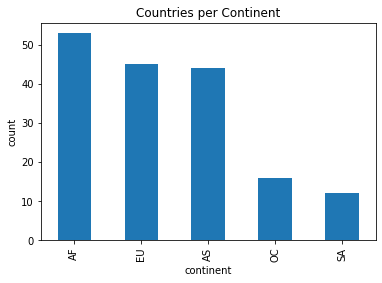

In [128]:
# bar plot of number of countries in each continent
drinks.continent.value_counts().plot(kind='bar', title='Countries per Continent')
plt.xlabel('continent')
plt.ylabel('count')
plt.show()

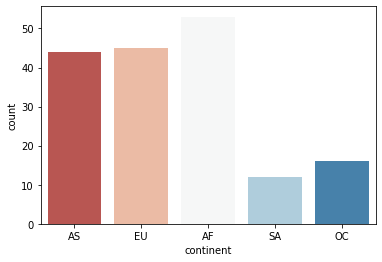

In [132]:
sns.countplot(x="continent", data=drinks, palette='RdBu')


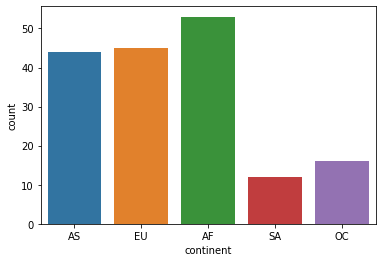

In [133]:
sns.countplot(drinks["continent"])

Text(0.5, 0, 'Beer Servings')

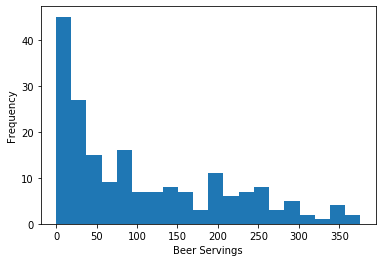

In [134]:
# histogram of beer servings (shows the distribution of a numeric column)
drinks.beer_servings.plot(kind='hist', bins=20)
plt.xlabel('Beer Servings')

In [136]:
sns.histogram(drinks['beer_servings'])

AttributeError: module 'seaborn' has no attribute 'histogram'

In [ ]:
sns.

Text(0.5, 0, 'Beer Servings')

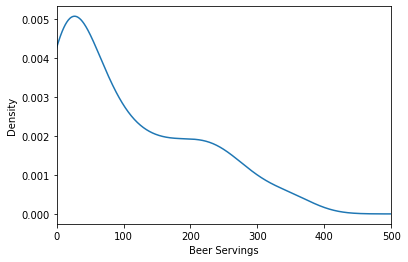

In [137]:
drinks.beer_servings.plot(kind='density', xlim=(0,500))
plt.xlabel('Beer Servings')

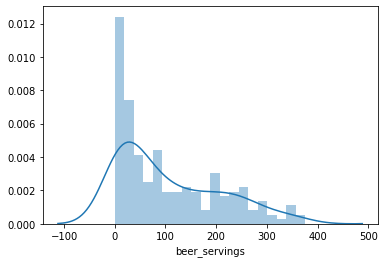

In [143]:
sns.distplot(drinks.beer_servings,  rug=False, kde=True, hist=True, bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000277DE8C3D48>,
      dtype=object)

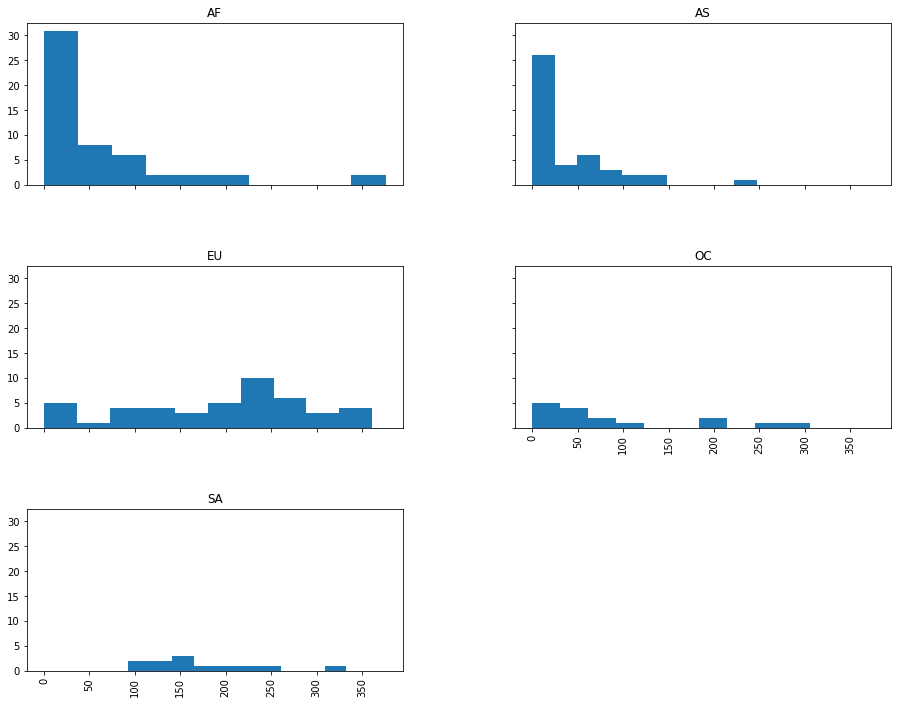

In [144]:
# grouped histogram of beer servings (shows the distribution for each group)
drinks.beer_servings.hist(by=drinks.continent, sharex=True, sharey=True, figsize=[15,12])

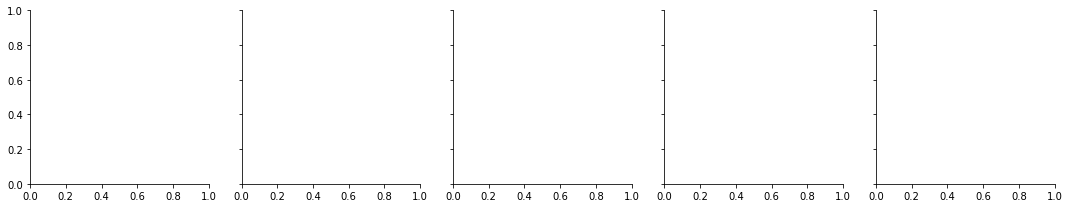

In [145]:
g = sns.FacetGrid(drinks, col="continent")

C:\Users\deesaw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


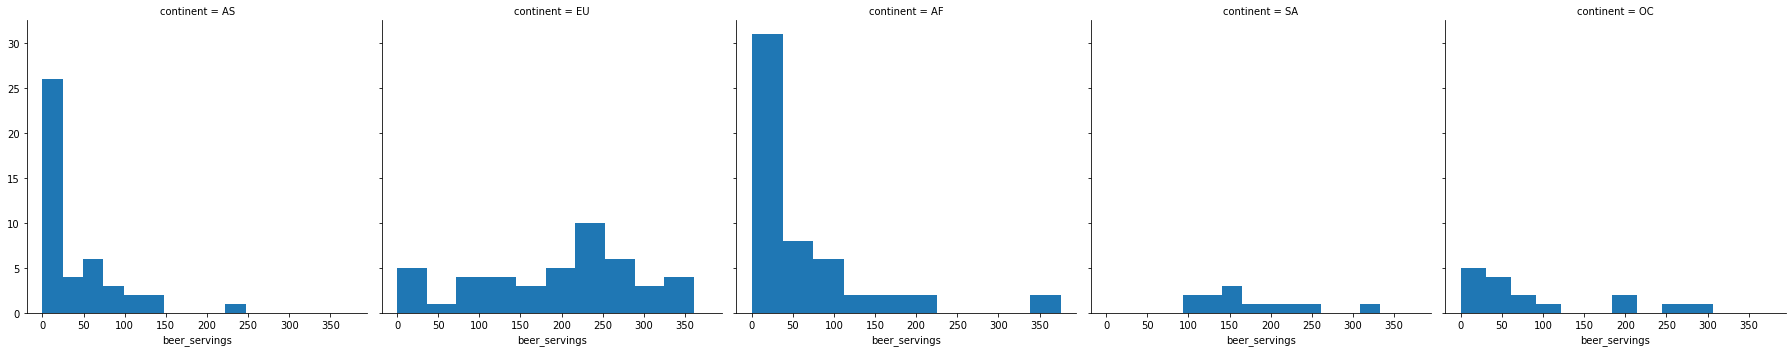

In [146]:
g = sns.FacetGrid(drinks, col="continent", size=5)
g.map(plt.hist, "beer_servings")

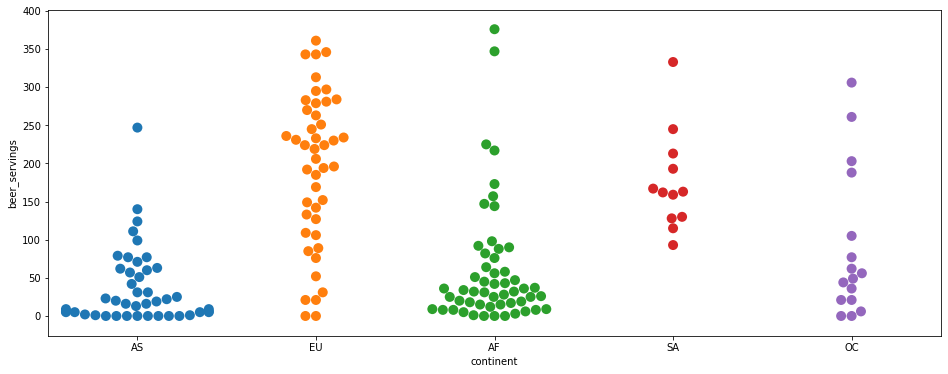

In [149]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x="continent", y="beer_servings", data=drinks, size=10)

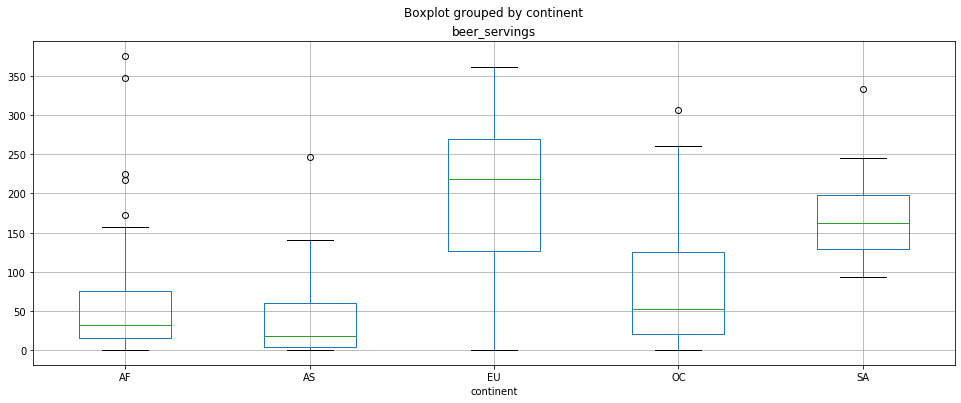

In [152]:
# boxplot of beer servings by continent (shows five-number summary and outliers)
# See this medium blog for a detailed explanation of boxplots: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
drinks.boxplot(column='beer_servings', by='continent', figsize=[16,6])

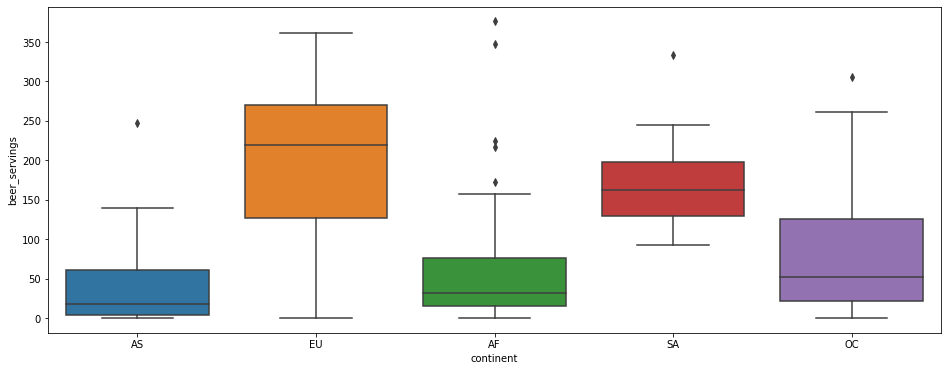

In [155]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="continent", y="beer_servings", data=drinks, orient="v")

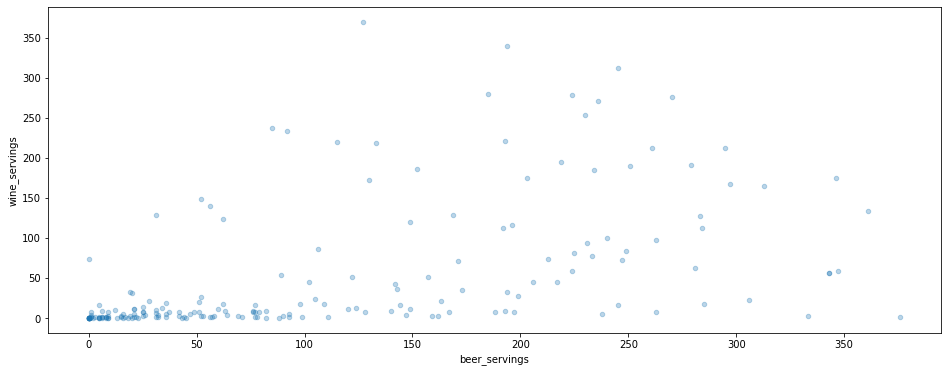

In [159]:
# scatterplot of beer servings versus wine servings
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', alpha=0.3, figsize=[16,6])

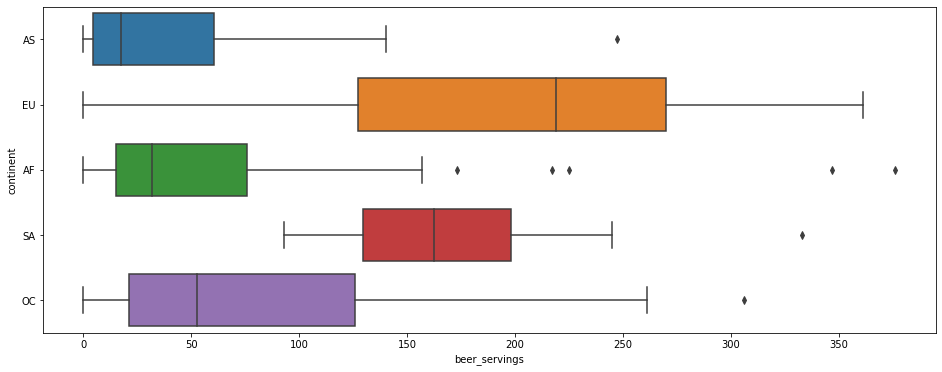

In [158]:
plt.figure(figsize=(16, 6))
sns.boxplot(drinks["beer_servings"],drinks["continent"], orient="h")

In [168]:
#sns.regplot(x="beer_servings", y="wine_servings", data=drinks, fit_reg=False)
plt.figure(figsize=(16, 6))
sns.regplot(x="beer_servings", y="wine_servings", data=drinks, hue="continent",fit_reg=True)

TypeError: regplot() got an unexpected keyword argument 'hue'

<Figure size 1152x432 with 0 Axes>

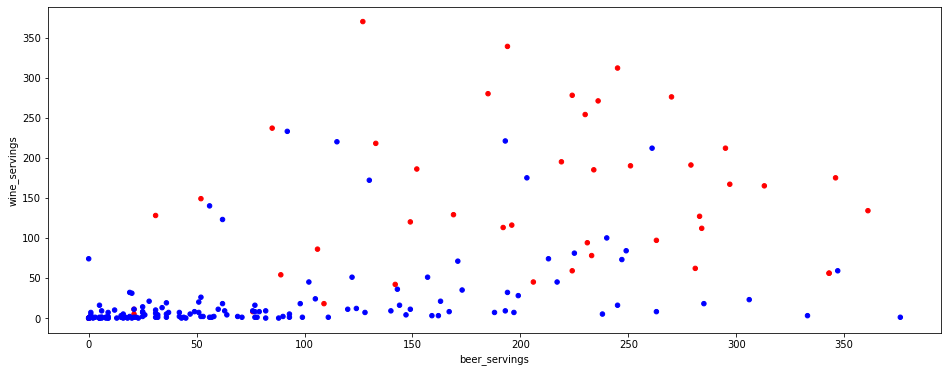

In [162]:
# same scatterplot, except all European countries are colored red
colors = np.where(drinks.continent=='EU', 'r', 'b')
drinks.plot(x='beer_servings', y='wine_servings', kind='scatter', c=colors, figsize=[16,6])

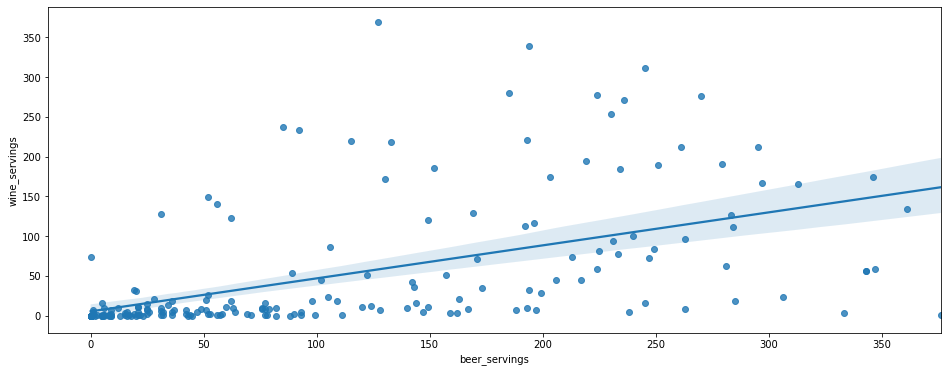

In [165]:
plt.figure(figsize=(16, 6))
sns.regplot(x="beer_servings", y="wine_servings", data=drinks, fit_reg=True)

In [166]:
drinks['EU'] = np.where(drinks.continent=='EU', 'r', 'b')

In [167]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,EU
0,Afghanistan,0,0,0,0.0,AS,b
1,Albania,89,132,54,4.9,EU,r
2,Algeria,25,0,14,0.7,AF,b
3,Andorra,245,138,312,12.4,EU,r
4,Angola,217,57,45,5.9,AF,b


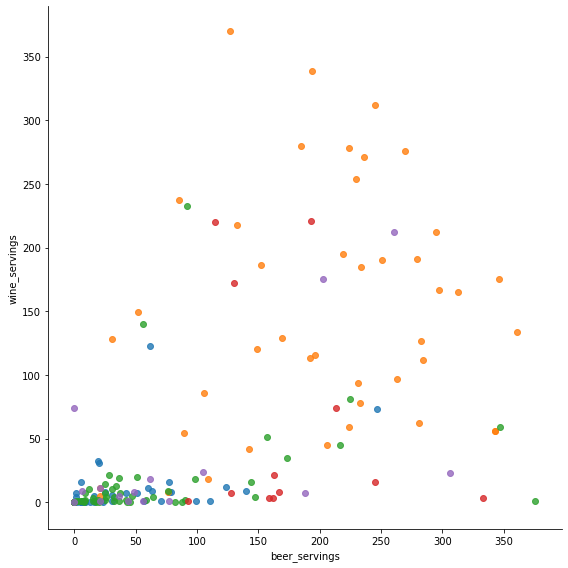

In [173]:
g = sns.FacetGrid(drinks, hue='continent', size=8)
g.map(sns.regplot,"beer_servings","wine_servings", fit_reg=False)

In [174]:
# scatterplot matrix of all numerical columns
pd.scatter_matrix(drinks, figsize=[25,20])

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

C:\Users\deesaw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


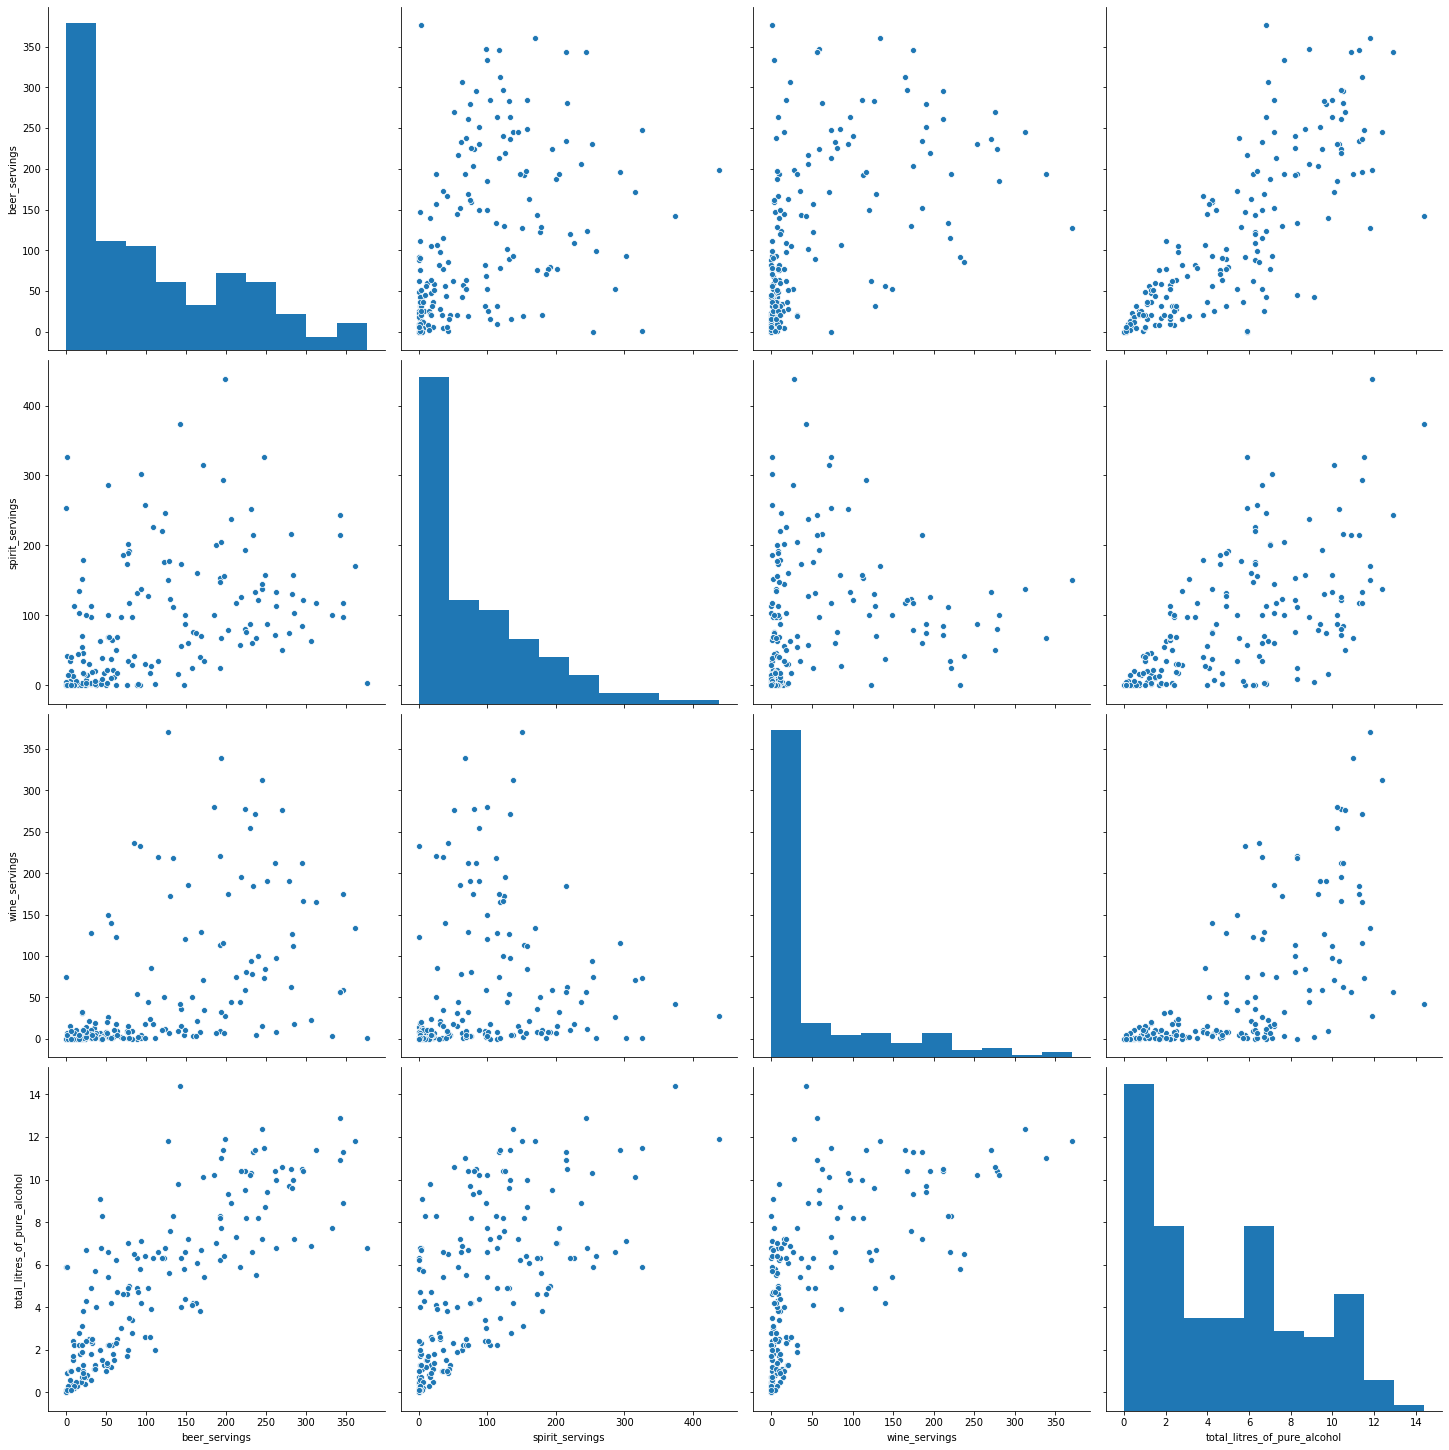

In [175]:
sns.pairplot(drinks, size=5)

C:\Users\deesaw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


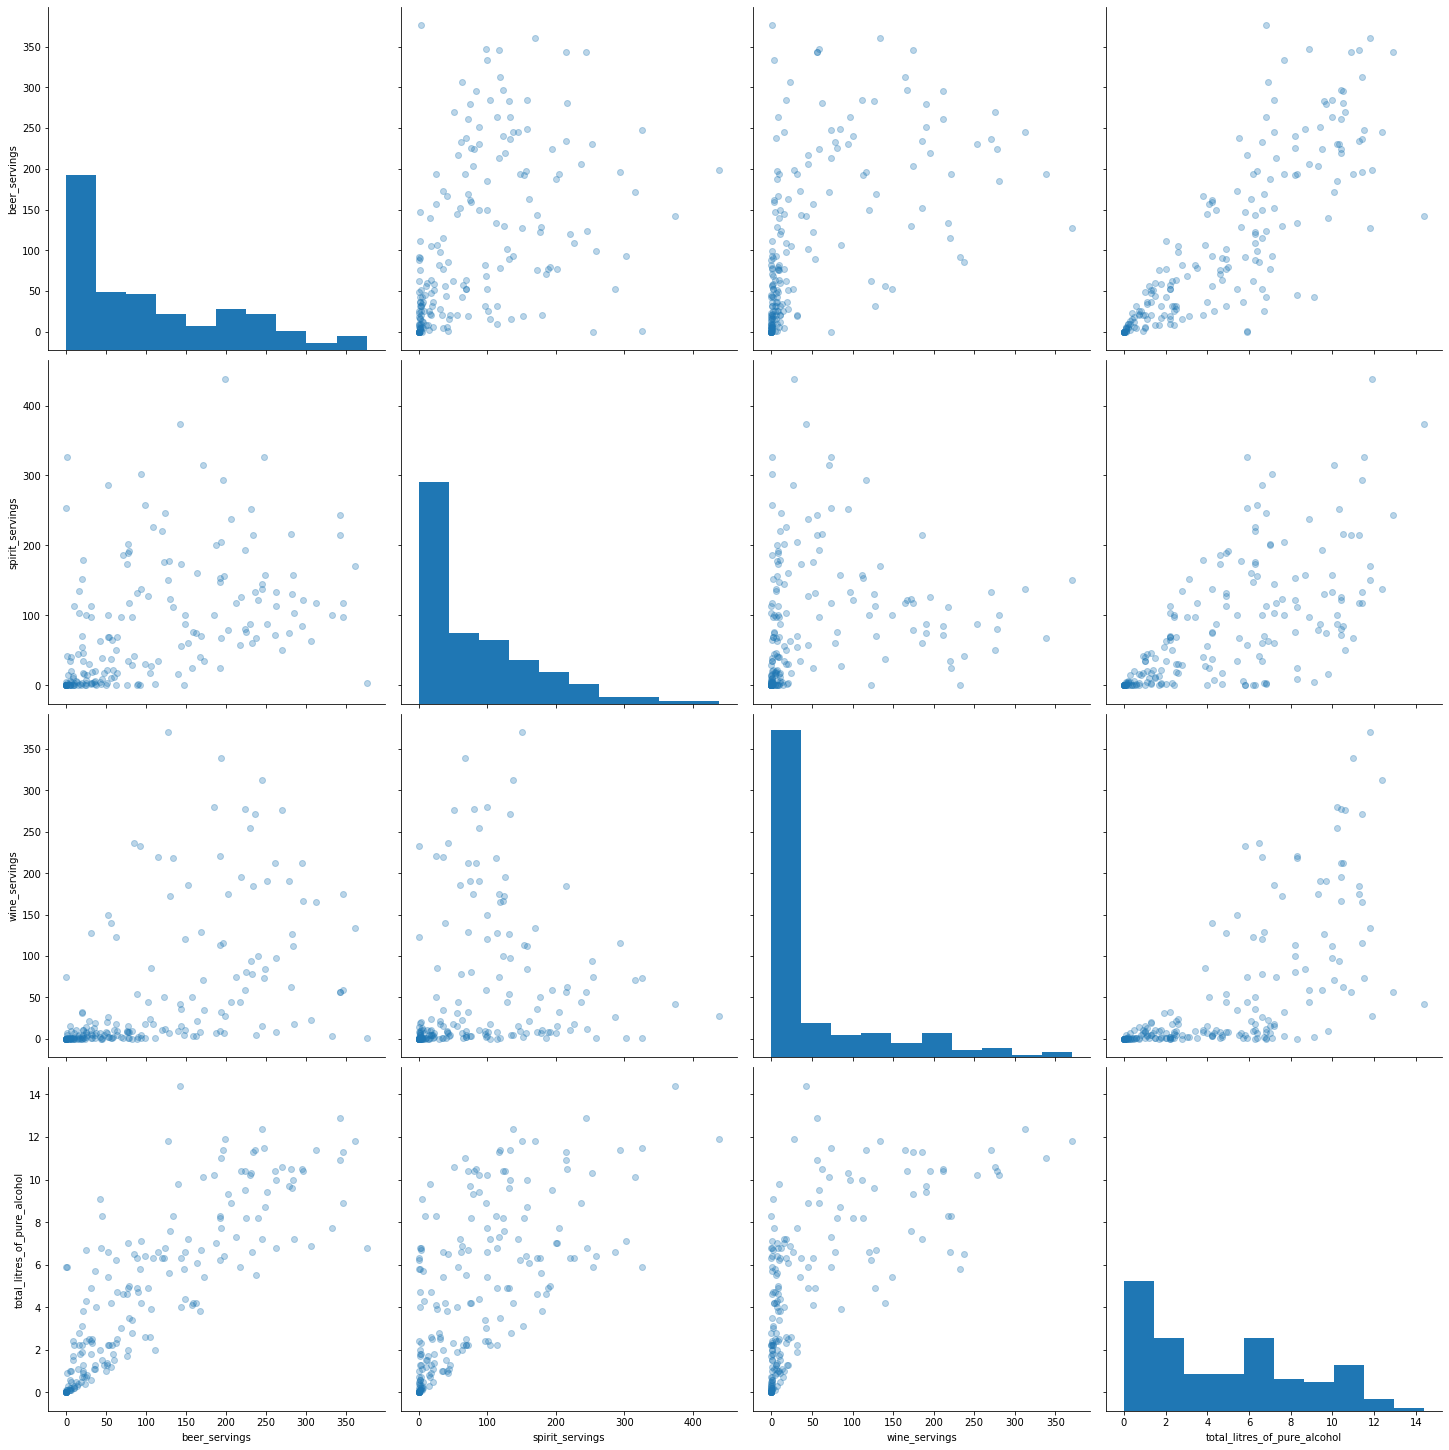

In [176]:
g = sns.PairGrid(drinks, size=5)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.3)

# Exercise 4: Statistical Visualizations
*10 Minutes*

Using both seaboard and matplotlib create a bar plot of number of sitings per state

Take a look at shape and color as well

In [199]:
# Feel free to read the ufo.csv data back into a dataframe called 'ufo', overriding any modifications made in previous examples exercises
ufoooo=pd.read_csv('../data/ufo.csv')

In [200]:
# Pull data from your ufo dataframe into either a series or another dataframe in preperation for aggregation at the state level
ufoo_copy=ufoooo.copy()

In [201]:
ufoooo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [202]:
del ufoooo['Time']

In [203]:
ufoooo.head()

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [204]:
ufoo_copy

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


In [213]:
ufo_df=ufoo_copy.groupby('State')['City'].count()
ufo_df

State
AK      403
AL      808
AR      747
AZ     3016
CA    10733
CO     1717
CT     1105
Ca        1
DE      221
FL     4801
Fl        4
GA     1564
HI      410
IA      799
ID      648
IL     2954
IN     1596
KS      737
KY     1040
LA      697
MA     1557
MD     1036
ME      712
MI     2346
MN     1217
MO     1806
MS      478
MT      601
NC     2156
ND      155
NE      460
NH      617
NJ     1712
NM      930
NV     1020
NY     3676
OH     2778
OK      873
OR     2111
PA     2985
RI      331
SC     1302
SD      234
TN     1364
TX     4184
UT      823
VA     1581
VT      355
WA     4807
WI     1491
WV      558
WY      239
Name: City, dtype: int64

In [222]:
ufo_d=pd.DataFrame(ufo_df.reset_index())

In [224]:
ufo_d.columns

Index(['State', 'City'], dtype='object')

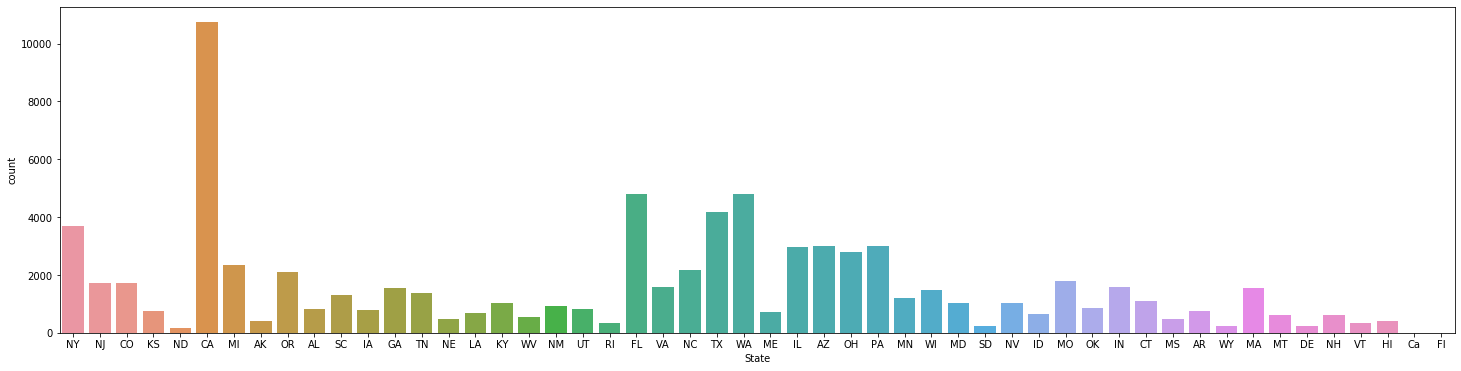

In [239]:
# Calculate aggregated sitings and prep series object/dataframe for plotting
plt.figure(figsize=(25, 6))
sns.countplot(x=ufoooo['State'])

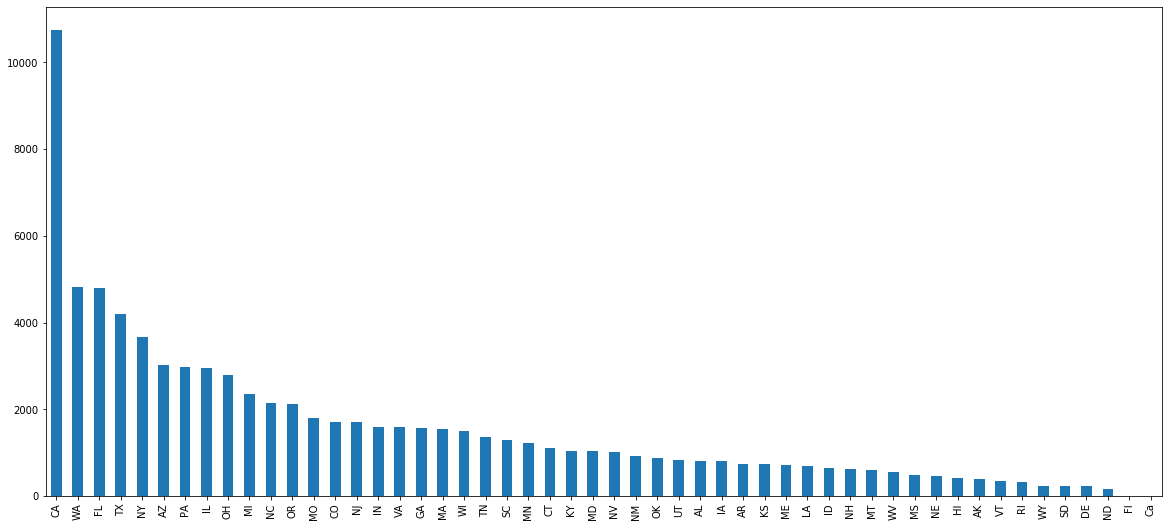

In [255]:
# Plot your bar chart
plt.figure(figsize=(20,9))
ufoooo.State.value_counts().plot(kind='bar')
plt.xlabel='State'
plt.ylabel='Count'
plt.title='Count by state'

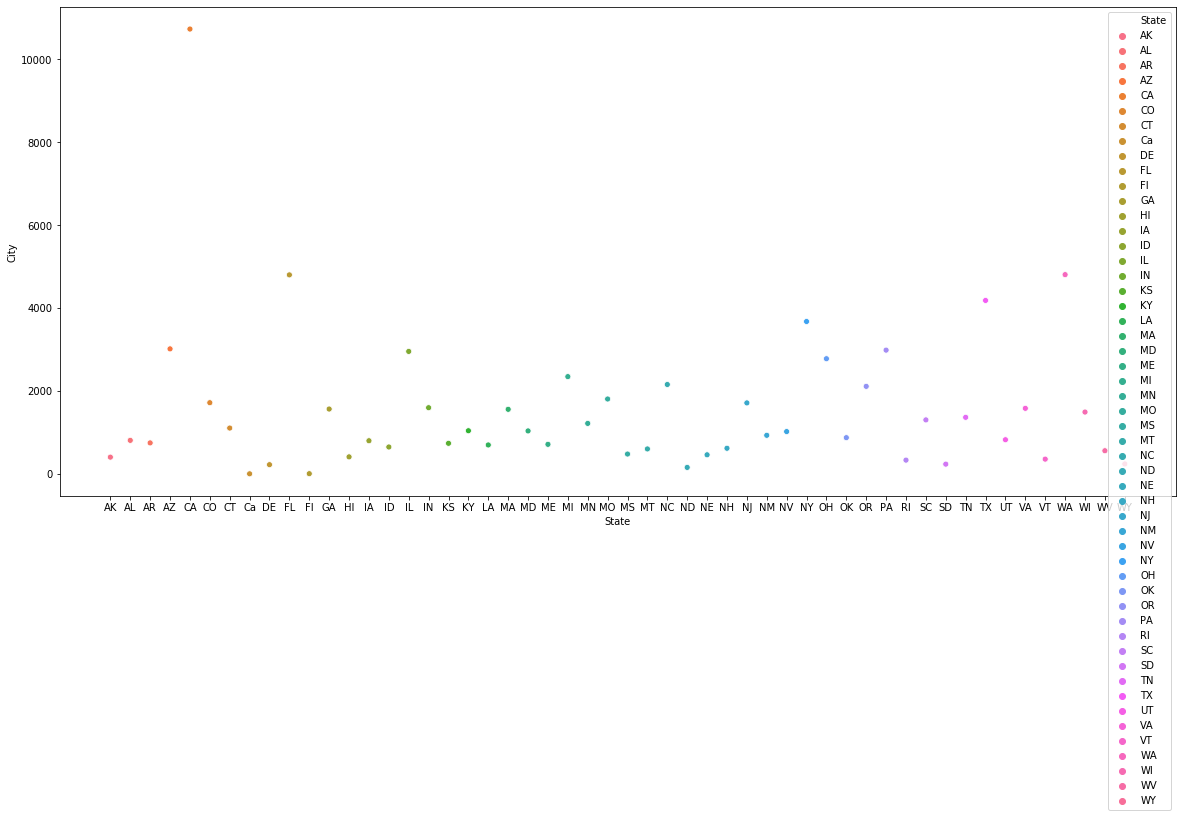

In [254]:
# With any remaining time carry out the same exercise grouping counts by shape and color
plt.figure(figsize=(20,9))
sns.scatterplot(x=ufo_d['State'],y=ufo_d['City'],hue=ufo_d['State'])

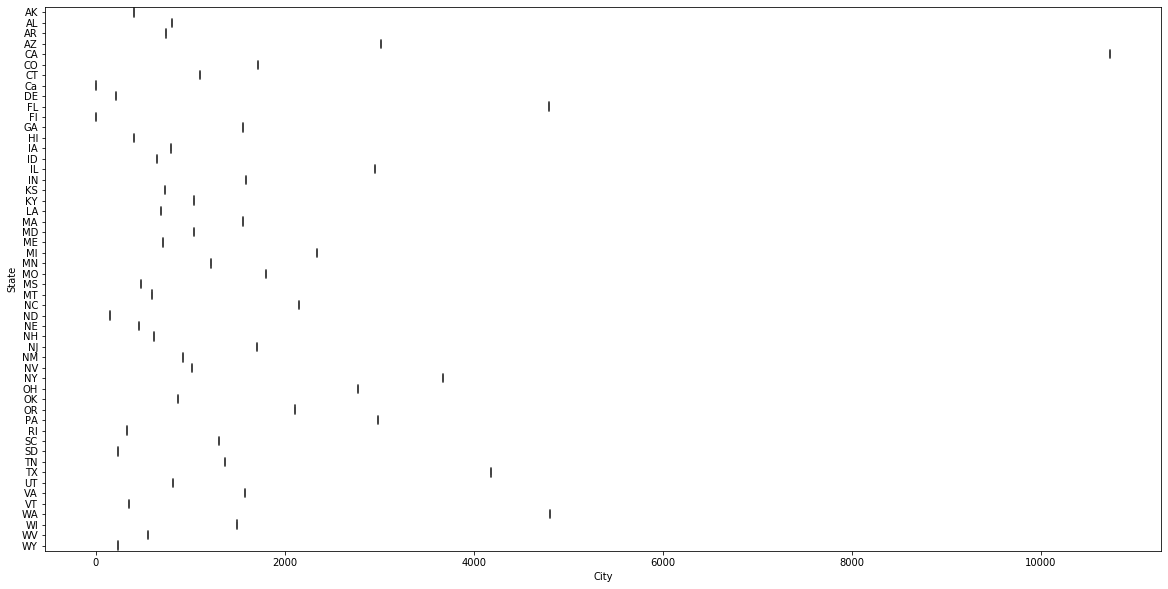

In [260]:
plt.figure(figsize=(20,10))
sns.boxplot(y='State',x='City',data=ufo_d,orient='h')

# Example 6: Indexing Manipulations

*5 Minutes*

In [177]:
ufo = pd.read_csv('../data/ufo.csv')

In [178]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [179]:
ufo.sort_values(by='State', ascending=True).head(10)

,City,Colors Reported,Shape Reported,State,Time
7233,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
61317,Anchorage,NaN,SPHERE,AK,1/23/2012 19:30
13440,Anchorage,NaN,DISK,AK,5/6/1999 13:30
67070,Ketchikan,NaN,LIGHT,AK,11/9/2012 22:00
4716,Juneau,ORANGE,SPHERE,AK,6/15/1982 14:00
15376,Seward,ORANGE,CIRCLE,AK,11/27/1999 11:00
8821,Prince of Wales Island,NaN,NaN,AK,10/27/1995 20:28
19623,Misty Fjords National Park,NaN,RECTANGLE,AK,7/7/2001 17:30
39821,Homer,NaN,FIREBALL,AK,4/24/2007 3:00
51416,Kaktovik,NaN,LIGHT,AK,12/1/2009 16:00


In [180]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [181]:
ufo.sort_values(by='State', ascending=True, inplace=True)
ufo.head(20)

,City,Colors Reported,Shape Reported,State,Time
7233,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
61317,Anchorage,NaN,SPHERE,AK,1/23/2012 19:30
13440,Anchorage,NaN,DISK,AK,5/6/1999 13:30
67070,Ketchikan,NaN,LIGHT,AK,11/9/2012 22:00
4716,Juneau,ORANGE,SPHERE,AK,6/15/1982 14:00
15376,Seward,ORANGE,CIRCLE,AK,11/27/1999 11:00
8821,Prince of Wales Island,NaN,NaN,AK,10/27/1995 20:28
19623,Misty Fjords National Park,NaN,RECTANGLE,AK,7/7/2001 17:30
39821,Homer,NaN,FIREBALL,AK,4/24/2007 3:00
51416,Kaktovik,NaN,LIGHT,AK,12/1/2009 16:00


In [182]:
# Reset the index
ufo.reset_index(inplace=True, drop=False)

In [183]:
ufo.head(10)

,index,City,Colors Reported,Shape Reported,State,Time
0,7233,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
1,61317,Anchorage,NaN,SPHERE,AK,1/23/2012 19:30
2,13440,Anchorage,NaN,DISK,AK,5/6/1999 13:30
3,67070,Ketchikan,NaN,LIGHT,AK,11/9/2012 22:00
4,4716,Juneau,ORANGE,SPHERE,AK,6/15/1982 14:00
5,15376,Seward,ORANGE,CIRCLE,AK,11/27/1999 11:00
6,8821,Prince of Wales Island,NaN,NaN,AK,10/27/1995 20:28
7,19623,Misty Fjords National Park,NaN,RECTANGLE,AK,7/7/2001 17:30
8,39821,Homer,NaN,FIREBALL,AK,4/24/2007 3:00
9,51416,Kaktovik,NaN,LIGHT,AK,12/1/2009 16:00


In [184]:
# Create a new index
ufo.set_index('State', inplace=True, drop=False)

In [185]:
ufo.head()

,index,City,Colors Reported,Shape Reported,State,Time
State,,,,,,
AK,7233,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
AK,61317,Anchorage,NaN,SPHERE,AK,1/23/2012 19:30
AK,13440,Anchorage,NaN,DISK,AK,5/6/1999 13:30
AK,67070,Ketchikan,NaN,LIGHT,AK,11/9/2012 22:00
AK,4716,Juneau,ORANGE,SPHERE,AK,6/15/1982 14:00


In [186]:
ufo.drop('index', inplace=True, axis=1)

In [187]:
ufo.head(10)

,City,Colors Reported,Shape Reported,State,Time
State,,,,,
AK,Fairbanks,BLUE,CIGAR,AK,11/23/1993 11:24
AK,Anchorage,NaN,SPHERE,AK,1/23/2012 19:30
AK,Anchorage,NaN,DISK,AK,5/6/1999 13:30
AK,Ketchikan,NaN,LIGHT,AK,11/9/2012 22:00
AK,Juneau,ORANGE,SPHERE,AK,6/15/1982 14:00
AK,Seward,ORANGE,CIRCLE,AK,11/27/1999 11:00
AK,Prince of Wales Island,NaN,NaN,AK,10/27/1995 20:28
AK,Misty Fjords National Park,NaN,RECTANGLE,AK,7/7/2001 17:30
AK,Homer,NaN,FIREBALL,AK,4/24/2007 3:00


In [188]:
ufo.index

Index(['AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK',
       ...
       'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY'],
      dtype='object', name='State', length=80543)

In [189]:
ufo.index.is_unique

False

In [190]:
ufo_original = pd.read_csv('../data/ufo.csv')

In [191]:
ufo_original.index.is_unique

True

In [ ]:
po